# Hermite Interpolation

Source: Saupin (2023) p.88; see also [Numerical Analysis with Python](https://yaningliucudenver.github.io/Numerical-Analysis-I/bookintro.html) by Yaning Liu, Giray Okten

In [2]:
from collections import namedtuple
import matplotlib.pyplot as plt
from functools import reduce
import numpy as np

In [3]:
def lagrange(xs, i):
    n = len(xs)
    den = reduce(lambda a, b : a * b,
                 [(xs[i] - xs[j]) for j in range(0, n) if j != i])
    return lambda x : reduce(lambda a, b : a * b,
                 [(x - xs[j]) for j in range(0, n) if j != i]) / den

In [4]:
def lagrangep(xs, i):
    n = len(xs)
    den = reduce(lambda a, b : a * b,
                 [(xs[i] - xs[j]) for j in range(0, n) if j != i])
    idx = set(range(0, n))
    return lambda x : np.sum([reduce(lambda a, b: a*b, [x - xs[k] for k in idx - {j,i}])
                              for j in range(0, n) if j != i]) / den

In [5]:
def q(xs, i):
    return lambda x: lagrange(xs, i)(x)**2

In [6]:
def qp(xs, i):
    return lambda x: 2 * lagrangep(xs, i)(x) * lagrange(xs, i)(x)

In [7]:
def derivative_part(xs, f_i, fp_i, i):
    qp_i = qp(xs, i)
    return lambda x : f_i + (x - xs[i]) * (fp_i - qp_i(xs[i]) * f_i)

In [8]:
def hermite(xs, f_i, fp_i, i):
    return lambda x: q(xs, i)(x) * derivative_part(xs, f_i, fp_i, i)(x)

In [9]:
def diff(f, x, h=1e-4):
    return (f(x + h) - f(x)) / h

In [10]:
xs = [1, 2, 3]
P_A = hermite(xs, 1, 1, 0)
P_B = hermite(xs, 3, 0, 1)
P_C = hermite(xs, -1, -1, 2)

In [11]:
# Polynôme de Hermite.
P_h = lambda x: P_A(x) + P_B(x) + P_C(x)

In [12]:
# Vérifions les ordonnées.
print(f"P_h(1) : {P_h(1)}")
print(f"P_h(2) : {P_h(2)}")
print(f"P_h(3) : {P_h(3)}")
# $P_h(A.x) : 1.0$
# $P_h(B.x) : 3.0$
# $P_h(C.x) : -1.0$

P_h(1) : 1.0
P_h(2) : 3.0
P_h(3) : -1.0


In [13]:
# Vérifions les dérivées.
print(f"diff P_h(1): {diff(P_h, 1)}")
print(f"diff P_h(1): {diff(P_h, 2)}")
print(f"diff P_h(3): {diff(P_h, 3)}")
# $P_h(A.x) : 1.0002$
# $P_h(B.x) : -0.00055$
# $P_h(C.x) : -0.99829$

diff P_h(1): 1.000200024992015
diff P_h(1): -0.0005500249988799055
diff P_h(3): -0.9982997749924394


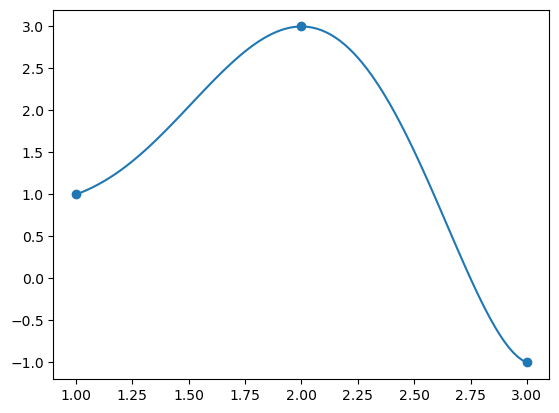

In [14]:
X = np.linspace(1, 3, 100)
Y = [P_h(x) for x in X]
plt.plot(X, Y)
plt.scatter([1, 2, 3], [1, 3, -1])
plt.show()